In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import sys
import os

p = !pwd
p = os.path.dirname(p[0])
if p not in sys.path:
    sys.path.append(p)

from experanto.data import Mouse2pChunkedDataset

In [3]:
root_folder = '/home/nibecker/datasets/dynamic29228-2-10-Video-konsti_wip05'
sampling_rate = 10  # Hz?
chunk_size = 20
dataset = Mouse2pChunkedDataset(root_folder, sampling_rate, chunk_size)

In [4]:
len(dataset)

24

In [5]:
dataset.device_names

('responses', 'screen', 'treadmill', 'eye_tracker')

In [6]:
res, scr, tr, eye = dataset[0]
res.shape, scr.shape, tr.shape, eye.shape


((20, 7928), (20, 36, 64), (20, 1), (20, 3))

In [7]:
data = dataset[0]
data.screen.shape

(20, 36, 64)

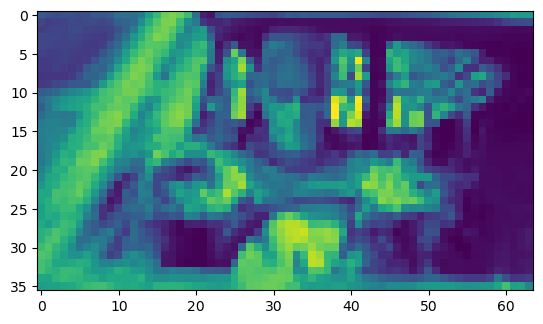

In [8]:
plt.imshow(scr[-1])

In [9]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [10]:
minibatch = next(iter(dataloader))
len(minibatch)
minibatch[0].shape

torch.Size([8, 20, 7928])

In [11]:
for d, v in zip(dataset.device_names, minibatch):
    print("{}: {}".format(d, v.shape))

responses: torch.Size([8, 20, 7928])
screen: torch.Size([8, 20, 36, 64])
treadmill: torch.Size([8, 20, 1])
eye_tracker: torch.Size([8, 20, 3])


# Static image dataset

In [30]:
from experanto.data import Mouse2pStaticImageDataset

In [31]:
offset = 0.1  # sec
stim_duration = 0.5  # sec
train_dataset = Mouse2pStaticImageDataset(root_folder, "train", offset, stim_duration)
len(train_dataset)

8

In [32]:
val_dataset = Mouse2pStaticImageDataset(root_folder, "validation", offset, stim_duration)
len(val_dataset)

0

In [33]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [60]:
minibatch = next(iter(train_dataloader))
len(minibatch)

4

In [61]:
minibatch.responses.shape, minibatch.screen.shape, minibatch.eye_tracker.shape

(torch.Size([8, 7928]), torch.Size([8, 36, 64]), torch.Size([8, 3]))

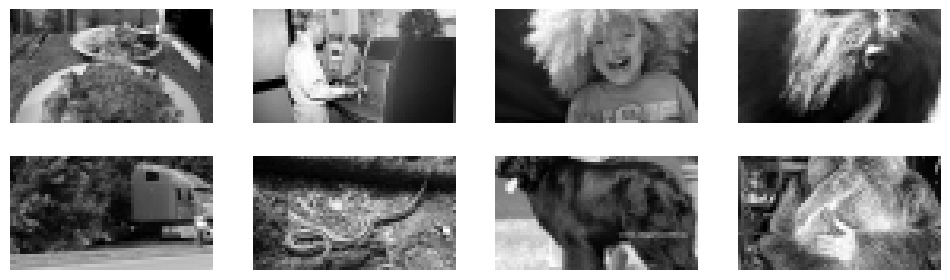

In [76]:
fig, axes = plt.subplots(2, 4, figsize=(12, 3.5))
for ax, im in zip(axes.flatten(), minibatch.screen):
    ax.imshow(im, cmap="gray")
    ax.axis("off")